In [53]:
##We load the packages used at the work
##We are going to use as rule pd for Pandas
##If you are going to use Matplotlib, Numpy or
##other, you should search how to name them 
## as rule.
##For keep the order you can use prettier
## in vscode


##Pandas is similar to tidyverse
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns
##The next package is used to format tables
##In the next lines you can watch how to use it
from tabulate import tabulate
from sklearn import svm
from sklearn import metrics

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import RocCurveDisplay
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split


from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

from sklearn import preprocessing
from numpy import mean
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold

##La tabla que vamos a emplear es esta, las demás han
##sido eliminadas
file="SouthGermanCredit.asc"
data=pd.read_csv(file," ")

##We are going to change the name of the variables 
##because in German is difficult to us work.
names={'laufkont':'Status',
        'laufzeit':'Duracion',
        'moral':'Historial_Crediticio',
        'verw':'Proposito',
        'hoehe':'Monto',
        'sparkont':'Ahorros',
        'beszeit':'Tiempo_trabajando',
        'rate':'Porcentaje_salario',
        'famges':'Estado_civil_sexo',
        'buerge':'Otros_deudores',
        'wohnzeit':'Residencia',
        'verm':'Propiedad_valiosa',
        'alter':'Edad',
        'weitkred':'Otras_deudas',
        'wohn':'Residencia',
        'bishkred':'Creditos_banco',
        'beruf':'Empleo',
        'pers':'Personas_dependientes',
        'telef':'Telefono',
        'gastarb':'Extranjero',
        'kredit':'Default',}


data.rename(columns=names,inplace=True)
#print(data.head(5))
#print(tabulate(data.head(5),headers='keys',tablefmt='latex_longtable'))
data.to_csv("datos.csv")

c:\Users\saac9\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\interactiveshell.py:3398: FutureWarning: In a future version of pandas all arguments of read_csv except for the argument 'filepath_or_buffer' will be keyword-only.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [54]:
##It's contructed a table of min and max of all to know if 
##the data doesn't have mistakes
data_1=data.agg(['min','max'])
print(tabulate(data_1.transpose(),headers='keys',tablefmt='latex_longtable'))

\begin{longtable}{lrr}
\hline
                       &   min &   max \\
\hline
\endhead
 Status                &     1 &     4 \\
 Duracion              &     4 &    72 \\
 Historial\_Crediticio  &     0 &     4 \\
 Proposito             &     0 &    10 \\
 Monto                 &   250 & 18424 \\
 Ahorros               &     1 &     5 \\
 Tiempo\_trabajando     &     1 &     5 \\
 Porcentaje\_salario    &     1 &     4 \\
 Estado\_civil\_sexo     &     1 &     4 \\
 Otros\_deudores        &     1 &     3 \\
 Residencia            &     1 &     4 \\
 Propiedad\_valiosa     &     1 &     4 \\
 Edad                  &    19 &    75 \\
 Otras\_deudas          &     1 &     3 \\
 Residencia            &     1 &     3 \\
 Creditos\_banco        &     1 &     4 \\
 Empleo                &     1 &     4 \\
 Personas\_dependientes &     1 &     2 \\
 Telefono              &     1 &     2 \\
 Extranjero            &     1 &     2 \\
 Default               &     0 &     1 \\
\hline
\end{longtabl

In [55]:
##We are going to construct the tables
##We are going to do a resume of five numbers
##Duracion, Monto, Edad
##First we select this three columns
##This new variable is the data.frame with,
##what we want
data_2=data[['Duracion','Edad','Monto','Tiempo_trabajando']]

summary_2=data_2.describe().transpose()
summary_2=summary_2.loc[:,summary_2.columns!='count']



print(tabulate(summary_2,headers='keys',tablefmt='latex_longtable'))

\begin{longtable}{lrrrrrrr}
\hline
                   &     mean &        std &   min &    25\% &    50\% &     75\% &   max \\
\hline
\endhead
 Duracion          &   20.903 &   12.0588  &     4 &   12   &   18   &   24    &    72 \\
 Edad              &   35.542 &   11.3527  &    19 &   27   &   33   &   42    &    75 \\
 Monto             & 3271.25  & 2822.75    &   250 & 1365.5 & 2319.5 & 3972.25 & 18424 \\
 Tiempo\_trabajando &    3.384 &    1.20831 &     1 &    3   &    3   &    5    &     5 \\
\hline
\end{longtable}


In [56]:
##A table count historial and default
historial_default=pd.crosstab(index=data['Default'],columns=data['Historial_Crediticio'],margins=True)
print(tabulate(historial_default,headers='keys',tablefmt='latex_longtable'))

\begin{longtable}{lrrrrrr}
\hline
 Default   &   0 &   1 &   2 &   3 &   4 &   All \\
\hline
\endhead
 0         &  25 &  28 & 169 &  28 &  50 &   300 \\
 1         &  15 &  21 & 361 &  60 & 243 &   700 \\
 All       &  40 &  49 & 530 &  88 & 293 &  1000 \\
\hline
\end{longtable}


In [57]:
##A table count savings and default
savings_default=pd.crosstab(index=data['Default'],columns=data['Ahorros'])
print(tabulate(savings_default,headers='keys',tablefmt='latex_longtable'))

\begin{longtable}{rrrrrr}
\hline
   Default &   1 &   2 &   3 &   4 &   5 \\
\hline
\endhead
         0 & 217 &  34 &  11 &   6 &  32 \\
         1 & 386 &  69 &  52 &  42 & 151 \\
\hline
\end{longtable}


# Descriptive analysis

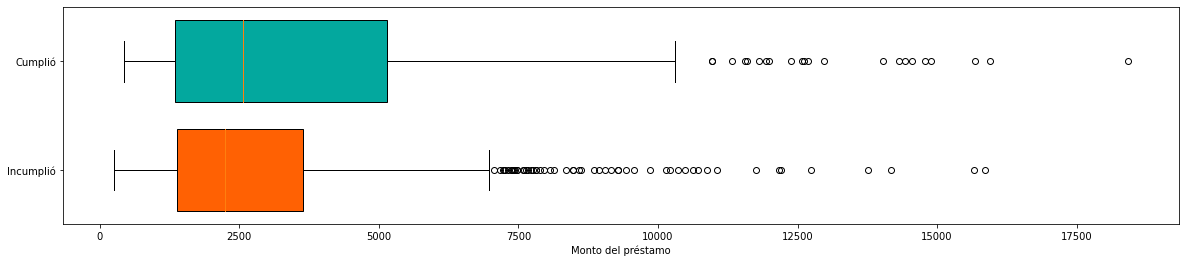

In [58]:
datosG1 = data.loc[:, ["Monto", "Default"]]
datosG2 = [datosG1[datosG1["Default"]==1].Monto, datosG1[datosG1["Default"]==0].Monto]
fig, (ax1) = plt.subplots(nrows=1, ncols=1, figsize=(20, 4))

# rectangular box plot
bplot1 = ax1.boxplot(datosG2,
                     vert=False,  # vertical box alignment
                     patch_artist=True,  # fill with color
                     labels=["Incumplió", "Cumplió"],
                     widths=(0.75, 0.75))  # will be used to label x-ticks

# Add some text for labels, title and custom x-axis tick labels, etc.                
#ax1.set_ylabel('Condición del prestamo')
ax1.set_xlabel('Monto del préstamo')
# fill with colors
for patch, color in zip(bplot1['boxes'], [ '#FF6103', '#03A89E']):
        patch.set_facecolor(color)

#plt.savefig('montos.pdf', bbox_inches='tight')
plt.show()


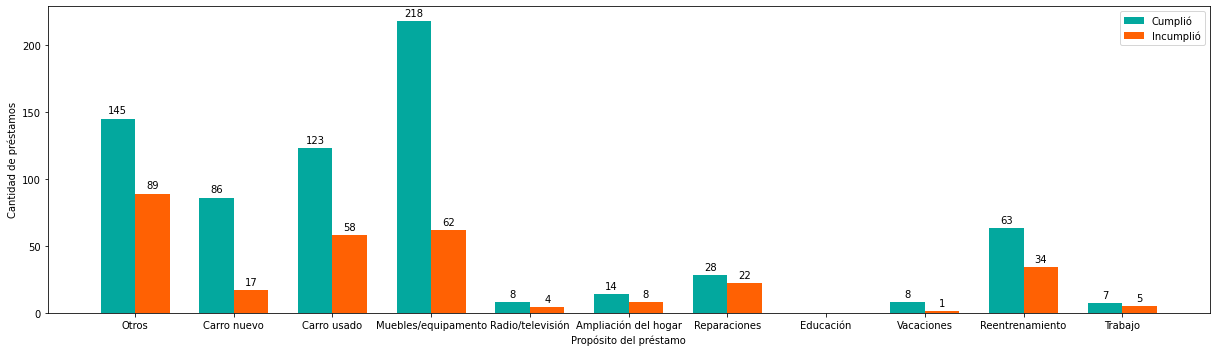

In [59]:
#Hacer que para cada uno de los labels este los default
datosG1 = data.loc[:, ["Proposito", "Default"]]
datosG1[datosG1["Default"]==1]
labels = [
    "Otros",
    "Carro nuevo",
    "Carro usado",
    "Muebles/equipamento",
    "Radio/televisión",
    "Ampliación del hogar",
    "Reparaciones",
    "Educación",
    "Vacaciones",
    "Reentrenamiento",
    "Trabajo"
]

eje1=np.unique(datosG1[datosG1["Default"]==1].Proposito, return_counts=True)
eje2=np.unique(datosG1[datosG1["Default"]==0].Proposito, return_counts=True)
x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(17, 5))
rects1 = ax.bar(eje1[0]- width/2 ,eje1[1], width, label='Cumplió', color=[ "#03A89E"])
rects2 = ax.bar(eje2[0]+ width/2, eje2[1], width, label='Incumplió', color=["#FF6103"])

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Cantidad de préstamos')
ax.set_xlabel('Propósito del préstamo')
#ax.set_title('Distribución de los motivos por los cuales se solicita un crédito')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects1)
autolabel(rects2)


fig.tight_layout()

#plt.savefig('Proposito.pdf', bbox_inches='tight')
plt.show()


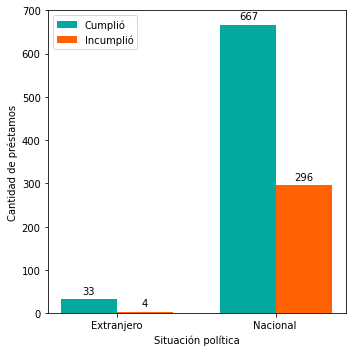

In [60]:
#Hacer que para cada uno de los labels este los default
datosG1 = data.loc[:, ["Extranjero", "Default"]]
datosG1[datosG1["Default"]==1]
labels = ["Extranjero", "Nacional "]

eje1=np.unique(datosG1[datosG1["Default"]==1].Extranjero, return_counts=True)
eje2=np.unique(datosG1[datosG1["Default"]==0].Extranjero, return_counts=True)
x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(5, 5))
rects1 = ax.bar(eje1[0]- width/2 ,eje1[1], width, label='Cumplió', color=[ "#03A89E"])
rects2 = ax.bar(eje2[0]+ width/2, eje2[1], width, label='Incumplió', color=[ "#FF6103"])

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Cantidad de préstamos')
ax.set_xlabel('Situación política')
#ax.set_title('Distribución de la nacionalidad')
ax.set_xticks([1,2])
ax.set_xticklabels(labels)
ax.legend()

def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects1)
autolabel(rects2)


fig.tight_layout()

#plt.savefig('nacionalidad.pdf', bbox_inches='tight')
plt.show()


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


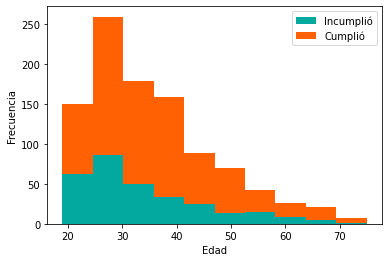

In [61]:
color=["#03A89E","#FF6103"]


pd.DataFrame({'Incumplió': data.groupby('Default').get_group(0).Edad,'Cumplió':   data.groupby('Default').get_group(1).Edad}).plot.hist(stacked=True, color = color).axes.get_xaxis()
plt.xlabel("Edad")
plt.ylabel("Frecuencia")
plt.savefig('AgeDistribution.eps', format='eps')
plt.show()


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


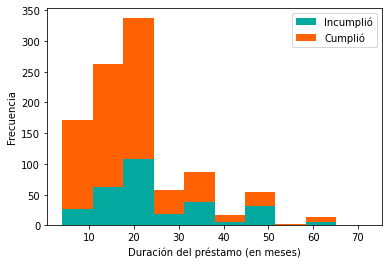

In [62]:
pd.DataFrame({'Incumplió': data.groupby('Default').get_group(0).Duracion,'Cumplió':   data.groupby('Default').get_group(1).Duracion}).plot.hist(stacked=True, color = color)
plt.xlabel("Duración del préstamo (en meses)")
plt.ylabel("Frecuencia")
plt.savefig('DurationDistribution.eps', format='eps')
plt.show()


    Tiempo_trabajando  Historial_Crediticio  Edad
0                   1                     0     1
1                   1                     1     5
2                   1                     2    31
3                   1                     3     6
4                   1                     4    19
5                   2                     0     9
6                   2                     1     9
7                   2                     2   111
8                   2                     3    12
9                   2                     4    31
10                  3                     0    18
11                  3                     1    15
12                  3                     2   189
13                  3                     3    33
14                  3                     4    84
15                  4                     0     3
16                  4                     1    10
17                  4                     2    89
18                  4                     3    17


<AxesSubplot:xlabel='Tiempo_trabajando', ylabel='Historial_Crediticio'>

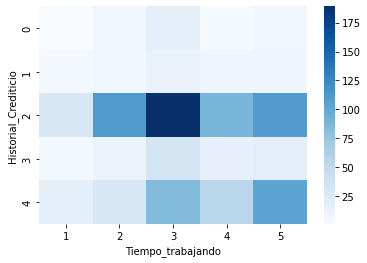

In [63]:
data_5=data[['Tiempo_trabajando','Historial_Crediticio','Edad']]

data_6= data_5.groupby(['Tiempo_trabajando','Historial_Crediticio'], as_index=False)["Edad"].count()


print(data_6)
df2=data_6.pivot(index='Historial_Crediticio', columns='Tiempo_trabajando', values='Edad')
df2

df2.fillna(0)


print(df2)

sns.heatmap(df2,cmap="Blues")

# Data preparation

In [64]:

#We preparate the data to be used
X=data.drop('Default',1)
X=X.values.tolist()
Y=data[['Default']]

#We make a set of train and a set of test
X_train, X_test, Y_train, Y_test_real=train_test_split(X,Y,test_size=0.2,random_state=7)

#We scale the data, it is used in SVM
#This elements correspond to the explicative variables
scaler_train=preprocessing.StandardScaler().fit(X_train)
X_train_scaled=scaler_train.transform(X_train)
scaler_test=preprocessing.StandardScaler().fit(X_test)
X_test_scaled=scaler_test.transform(X_test)


#These are the respond variables
Y_train=Y_train.values.ravel()
Y_test_real=Y_test_real.values.ravel()


C:\Users\saac9\AppData\Local\Temp\ipykernel_16560\2664866946.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X=data.drop('Default',1)


# SVM

In [65]:

#We define the kernels
kernels=['poly','rbf','sigmoid']

#We define crossvalidation
cv=RepeatedStratifiedKFold(n_splits=10)

#First we select the parameter C by crossvalidation and compare the results for every kernel
#We penalize the class with more observations
C=0
best_score=0
model_k=''
kernel=[]
tolerance=[]
scores=[]


for j in kernels:
    for i in [1,*range(10,110,10)]:
        model=svm.SVC(kernel=j,C=i,degree=3,class_weight='balanced')
        score = mean(cross_val_score(model, X_train_scaled, Y_train, scoring='roc_auc', cv=cv, n_jobs=-1))
        kernel.append(j)
        tolerance.append(i)
        scores.append(score)
        #paint.append(color_triad[k]) 
        if score>best_score:
            best_score=score
            model_k=j
            C=i
print(C,model_k,i,best_score)

1 rbf 100 0.7849289494115724


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


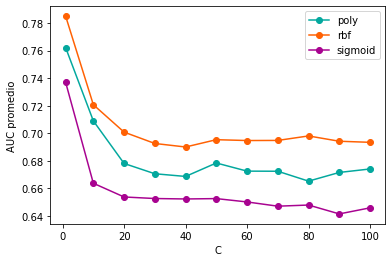

In [66]:
#We construct a dataframe to graph the results of cross validation balanced
#It is the continuation of the last chunk, is the graph to watch 
result_cross_val={'Kernel':kernel,'C':tolerance,'AUC':scores}
result_cross_val=pd.DataFrame(result_cross_val)

#We create the graph
color_triad=["#03A89E","#FF6103",'#A80390']
k=0
groups=result_cross_val.groupby('Kernel')
for name, group in groups:
    plt.plot(group['C'],group['AUC'],marker='o',linestyle='solid', color= color_triad[k],label=kernels[k])
    k=k+1
plt.legend(loc='upper right')
plt.xlabel('C')
plt.ylabel('AUC promedio')
#result_cross_val.set_index('C',inplace=True)
#result_cross_val.groupby('Kernel')['AUC'].plot(legend=True)
plt.savefig("AUC_cross_v_b.eps", format="eps")

In [67]:
#The model without penalization to size of class is programmed here
C=0
best_score=0
model_k=''
kernel=[]
tolerance=[]
scores=[]
#paint=[]

for j in kernels:
    for i in [1,*range(10,110,10)]:
        model=svm.SVC(kernel=j,C=i,degree=3)
        score = mean(cross_val_score(model, X_train_scaled, Y_train, scoring='roc_auc', cv=cv, n_jobs=-1))
        kernel.append(j)
        tolerance.append(i)
        scores.append(score)
        #paint.append(color_triad[k]) 
        if score>best_score:
            best_score=score
            model=j
            C=i
print(C,model_k,i,best_score)

1  100 0.7878059619156588


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


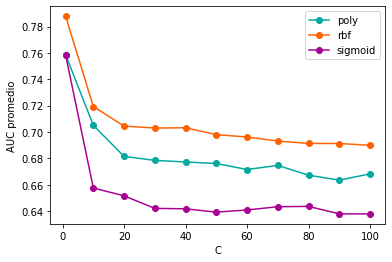

In [68]:
#We construct a dataframe to graph the results of cross validation unbalanced
result_cross_val={'Kernel':kernel,'C':tolerance,'AUC':scores}
result_cross_val=pd.DataFrame(result_cross_val)
#We create the graph
color_triad=["#03A89E","#FF6103",'#A80390']
k=0
groups=result_cross_val.groupby('Kernel')
for name, group in groups:
    plt.plot(group['C'],group['AUC'],marker='o',linestyle='solid', color= color_triad[k],label=kernels[k])
    k=k+1
plt.legend(loc='upper right')
plt.xlabel('C')
plt.ylabel('AUC promedio')
#result_cross_val.set_index('C',inplace=True)
#result_cross_val.groupby('Kernel')['AUC'].plot(legend=True)
plt.savefig("AUC_cross_v_ub.eps", format="eps")

In [69]:
#Here we do cross validation to watch the possible
#best gamma value. In this particular case we
#use gaussian kernel and C=1


#In this chunk we do for 1, 10, 20,...,100
scores=[]
tolerance=[]
case=[]
gamma=0
best_score=0
case.append('Default')
model=svm.SVC(kernel='rbf',C=1) #In this case the gamma is the default gamma show in the next computation of gamma
best_score = mean(cross_val_score(model, X_train_scaled, Y_train, scoring='roc_auc', cv=cv, n_jobs=-1))
scores.append(best_score)
n_features = X_train_scaled.shape[1]
gamma = 1 / (n_features * X_train_scaled.var())
tolerance.append(gamma)
for i in [1,*range(10,110,10)]:
        model=svm.SVC(kernel='rbf',C=1,gamma=i)
        score = mean(cross_val_score(model, X_train_scaled, Y_train, scoring='roc_auc', cv=cv, n_jobs=-1))
        case.append('Variando')
        tolerance.append(i)
        scores.append(score)
        if score>best_score:
            best_score=score
            gamma=i
print(gamma,best_score)

0.05000000000000004 0.786856151928735


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


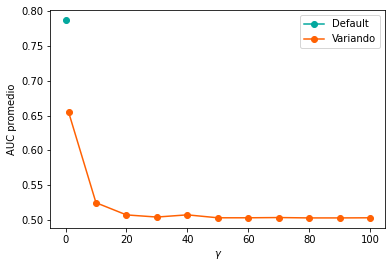

In [70]:
#We create a graph results of the last chunk
result_cross_val={'Caso':case,'$\gamma$':tolerance,'AUC':scores}
result_cross_val=pd.DataFrame(result_cross_val)
#We create the graph
color_triad=["#03A89E","#FF6103"]
k=0
groups=result_cross_val.groupby('Caso')
for name, group in groups:
    plt.plot(group['$\gamma$'],group['AUC'],marker='o',linestyle='solid', color= color_triad[k],label=case[k])
    k=k+1
plt.legend(loc='upper right')
plt.xlabel('$\gamma$')
plt.ylabel('AUC promedio')
plt.savefig("AUC_cross_v_gamma.eps", format="eps")

In [71]:
#Here we do cross validation to watch the possible
#best gamma value. In this particular case we
#use gaussian kernel and C=1

#In this chunk we do for 1,1/10,1/20,..,1/100
scores=[]
tolerance=[]
case=[]
gamma=0
best_score=0
case.append('Default')
model=svm.SVC(kernel='rbf',C=1) #In this case the gamma is the default gamma show in the next computation of gamma
best_score = mean(cross_val_score(model, X_train_scaled, Y_train, scoring='roc_auc', cv=cv, n_jobs=-1))
scores.append(best_score)
n_features = X_train_scaled.shape[1]
gamma = 1 / (n_features * X_train_scaled.var())
tolerance.append(gamma)
for i in range(10,110,10):
        model=svm.SVC(kernel='rbf',C=1,gamma=1/i)
        score = mean(cross_val_score(model, X_train_scaled, Y_train, scoring='roc_auc', cv=cv, n_jobs=-1))
        case.append('Variando')
        tolerance.append(1/i)
        scores.append(score)
        #paint.append(color_triad[k]) 
        if score>best_score:
            best_score=score
            gamma=1/i
print(gamma,best_score)

0.02 0.7933401949166392


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


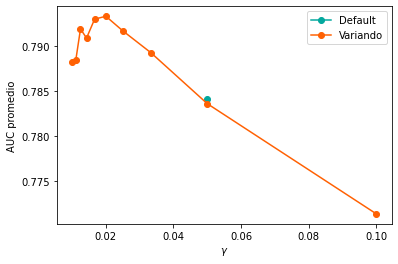

In [72]:
#We create a graph results of the last chunk
result_cross_val={'Caso':case,'$\gamma$':tolerance,'AUC':scores}
result_cross_val=pd.DataFrame(result_cross_val)
#We create the graph
color_triad=["#03A89E","#FF6103"]
k=0
groups=result_cross_val.groupby('Caso')
for name, group in groups:
    plt.plot(group['$\gamma$'],group['AUC'],marker='o',linestyle='solid', color= color_triad[k],label=case[k])
    k=k+1
plt.legend(loc='upper right')
plt.xlabel('$\gamma$')
plt.ylabel('AUC promedio')
plt.savefig("AUC_cross_v_gamma.eps", format="eps")

In [73]:
#confusion matrix
#This is for unscaled data
def confusion(modelo):
    fig, ax = plt.subplots(figsize=(5, 5))
    Predicciones=modelo.predict(X_test)
    fir_matrix=confusion_matrix(Y_test_real, Predicciones, labels=[1,0])
    matrix_conf=ConfusionMatrixDisplay(fir_matrix, display_labels=['V','F'])
    matrix_conf.plot(colorbar=False, ax=ax, cmap="Blues")
    matrix_conf.ax_.set(xlabel='Predicciones', ylabel='Datos verdaderos')
    matrix_conf.ax_.set_title("Matriz de confusión")

In [74]:
#ROC and AUC
#This is for unscaled data
def curvasROC(modelo):
    Predicciones =modelo.predict(X_test)
    tn, fp, fn, tp = confusion_matrix(Y_test_real,Predicciones).ravel()
    tpr=tp/(tp+fn)
    fpr=fp/(fp+tn)
    roc_auc = metrics.auc(([0., fpr, 1.]),([0., tpr, 1.]))

    fig, ax = plt.subplots(figsize=(5, 5))
    Probabilistico=RocCurveDisplay.from_estimator(modelo, X_test,
     Y_test_real, color= "#FF6103" , ax = ax, name = "ROC probabilística")

    display=RocCurveDisplay(fpr=([0., fpr, 1.]), tpr=([0., tpr, 1.]),  roc_auc=roc_auc,
                                   estimator_name='ROC puntual')
    display.plot(color="#03A89E",ax=ax)

    plt.plot([0, 1], [0, 1], color="navy", lw=1, linestyle="--")  
    plt.scatter(fpr, tpr, color ="#03A89E" )
    plt.xlabel("1-Especificidad")
    plt.ylabel("Sensibilidad")
    plt.title("Curva ROC y valor AUC")

In [75]:
#confusion matrix
#This is for unscaled data
def confusion_scaled(modelo):
    fig, ax = plt.subplots(figsize=(5, 5))
    Predicciones=modelo.predict(X_test_scaled)
    fir_matrix=confusion_matrix(Y_test_real, Predicciones, labels=[1,0])
    matrix_conf=ConfusionMatrixDisplay(fir_matrix, display_labels=['V','F'])
    matrix_conf.plot(colorbar=False, ax=ax, cmap="Blues")
    matrix_conf.ax_.set(xlabel='Predicciones', ylabel='Datos verdaderos')
    matrix_conf.ax_.set_title("Matriz de confusión")

In [76]:
#ROC and AUC for scaled data
def curvasROC_scaled(modelo):
    Predicciones =modelo.predict(X_test_scaled)
    tn, fp, fn, tp = confusion_matrix(Y_test_real,Predicciones).ravel()
    tpr=tp/(tp+fn)
    fpr=fp/(fp+tn)
    roc_auc = metrics.auc(([0., fpr, 1.]),([0., tpr, 1.]))

    fig, ax = plt.subplots(figsize=(5, 5))
    Probabilistico=RocCurveDisplay.from_estimator(modelo, X_test_scaled,
     Y_test_real, color= "#FF6103" , ax = ax, name = "ROC probabilística")

    display=RocCurveDisplay(fpr=([0., fpr, 1.]), tpr=([0., tpr, 1.]),  roc_auc=roc_auc,
                                   estimator_name='ROC puntual')
    display.plot(color="#03A89E",ax=ax)

    plt.plot([0, 1], [0, 1], color="navy", lw=1, linestyle="--")  
    plt.scatter(fpr, tpr, color ="#03A89E" )
    plt.xlabel("1-Especificidad")
    plt.ylabel("Sensibilidad")
    plt.title("Curva ROC y valor AUC")

# Final model SVM

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


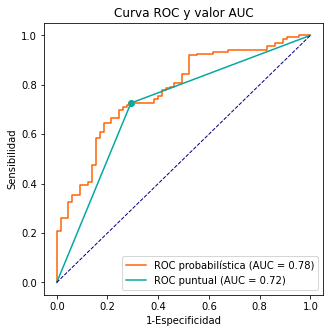

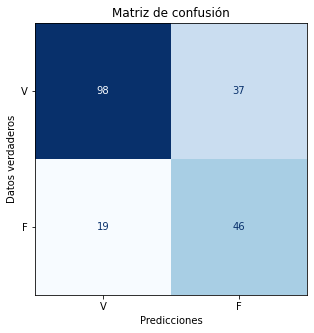

In [77]:
#We take the model with rbf kernel and parameter and graph the roc curve and confusion matrix
#The graph respect to the work is going to change by the change of the gamma
svm_rbf=svm.SVC(kernel='rbf',probability=True,C=1,class_weight='balanced',gamma=gamma)
svm_rbf.fit(X_train_scaled,Y_train)
curvasROC_scaled(svm_rbf)
plt.savefig("AUC_prediccion.eps", format="eps")
confusion_scaled(svm_rbf)
plt.savefig("matriz_confusion.eps", format="eps")

# LR

In [78]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train,Y_train)
y_pred=logreg.predict(X_test)

c:\Users\saac9\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [79]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model = model.fit(X_train,Y_train)

c:\Users\saac9\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [80]:
def confusion(modelo):
    fig, ax = plt.subplots(figsize=(5, 5))
    Predicciones=modelo.predict(X_test)
    fir_matrix=confusion_matrix(Y_test_real, Predicciones, labels=[1,0])
    matrix_conf=ConfusionMatrixDisplay(fir_matrix, display_labels=['V','F'])
    matrix_conf.plot(colorbar=False, ax=ax, cmap="Blues")
    matrix_conf.ax_.set(xlabel='Predicciones', ylabel='Datos verdaderos')
    matrix_conf.ax_.set_title("Matriz de confusión")

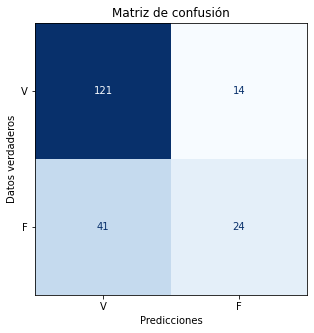

In [81]:
confusion(logreg)
plt.savefig("confusionmatrixlog.eps", format="eps")

In [82]:
def curvasROC(modelo):
    fig, ax = plt.subplots(figsize=(5, 5))
    Probabilistico=RocCurveDisplay.from_estimator(modelo, X_test,
     Y_test_real, color= "#FF6103" , ax = ax, name = "ROC")


    plt.plot([0, 1], [0, 1], color="navy", lw=1, linestyle="--")  
    #plt.scatter(fpr, tpr, color ="#03A89E" )
    plt.xlabel("1-Especificidad")
    plt.ylabel("Sensibilidad")
    plt.title("Curva ROC y valor AUC")

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


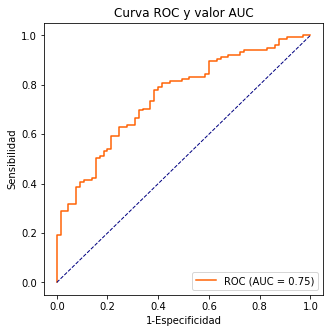

In [83]:
curvasROC(logreg)
plt.savefig("ROClog.eps", format="eps")

In [84]:
import numpy as np
import scipy.optimize as ot
from sklearn.linear_model import LogisticRegression

#Train the model
logreg = LogisticRegression()
logreg.fit(X_train,Y_train)

#Create the function objective to optimize the Youden index  
def objective(x):
    y_pred_new_threshold = (logreg.predict_proba(X_test)[:,1]>=x).astype(int)
    tn, fp, fn, tp = confusion_matrix(Y_test_real,y_pred_new_threshold).ravel()
    tpr=tp/(tp+fn)
    fpr=tn/(tn+fp)
    youden=fpr+tpr-1
    return -youden

#Optimize the Youden index 
solution = ot.minimize_scalar(objective,bounds=(0,1), method='bounded')
x = solution.x
#We create the model with the values
y_pred_new_threshold = (logreg.predict_proba(X_test)[:,1]>=x).astype(int)
tn, fp, fn, tp = confusion_matrix(Y_test_real,y_pred_new_threshold).ravel()
tpr=tp/(tp+fn)
fpr=tn/(tn+fp)

c:\Users\saac9\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Text(0.5, 1.0, 'Matriz de confusión')

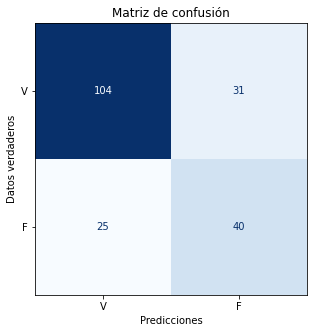

In [85]:
# Create confusion matrix with threshold given by Youden index 
fig, ax = plt.subplots(figsize=(5, 5))
Predicciones=(logreg.predict_proba(X_test)[:,1]>=x).astype(int)
fir_matrix=confusion_matrix(Y_test_real, Predicciones, labels=[1,0])
matrix_conf=ConfusionMatrixDisplay(fir_matrix, display_labels=['V','F'])
matrix_conf.plot(colorbar=False, ax=ax, cmap="Blues")
matrix_conf.ax_.set(xlabel='Predicciones', ylabel='Datos verdaderos')
matrix_conf.ax_.set_title("Matriz de confusión")

# Final model LR

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


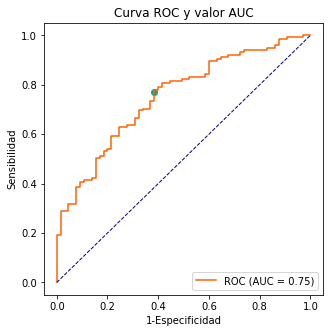

In [86]:
# Create curve ROC and calculate AUC value
fig, ax = plt.subplots(figsize=(5, 5))
Probabilistico=RocCurveDisplay.from_estimator(logreg, X_test,
Y_test_real, color= "#FF6103" , ax = ax, name = "ROC")
plt.plot([0, 1], [0, 1], color="navy", lw=1, linestyle="--")  
plt.scatter(1-fpr, tpr, color ="#03A89E" )
plt.xlabel("1-Especificidad")
plt.ylabel("Sensibilidad")
plt.title("Curva ROC y valor AUC")
plt.savefig("ROCyAUCLR.eps", format="eps")